# Week 11 Practical - Network Analysis

In this practical, we will form a small network using the connections between students in this prac, and then we'll look at a much
bigger network (passenger routes between Australian airports).

First import the Python modules we need: we'll need `math`, `networkx`, `pandas` and `matplotlib`.

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np

### Class network exercise


Unless your SGTA leader has created another spreadsheet for you, use the following spreadsheet.

https://mqoutlook-my.sharepoint.com/:x:/g/personal/greg_baker_mq_edu_au/EZ0yJXjL_X5LjDXzugsItLYBou_OqkxoyNFC9exHXFyYyg?e=dOFU3t

Look for the worksheet tab with your prac group. Add a row with a pseudonym and the unit codes you are studying this semester (not including COMP2200/COMP6200).

When everyone has finished entering data, download the spreadsheet (File -> Create a copy -> Download).

Using `pandas`, load the spreadsheet and build a graph where each student is a node and an edge exists when two students share a unit other than COMP2200/COMP6200.)

If you get an error about `openpyxl` not being available, fix that with whatever tool you use to manage packages (`pip install openpyxl` or `uv add openpyxl` or `conda install openpyxl`)

In [2]:
# Load the spreadsheet (adjust filename and sheet name as needed)
# class_df = pd.read_excel('class_network.xlsx', sheet_name='Wed 11am prac')
class_df = pd.read_csv('COMP2200-6200 Week 11 Practical(Sample).csv')

class_df

,Name,Unit1,Unit2,Unit3,Unit4
0,Alex,COMP123,COMP101,STAT201,PHYS100
1,Blake,COMP101,MATH105,COMP123,BUS200
2,Casey,COMP123,BIO101,CHEM202,COMP101
3,Dana,MATH105,PHYS100,COMP123,STAT201
4,Eli,BUS200,COMP101,MATH105,COMP123
5,Frank,BIO101,COMP101,COMP123,PHYS100
6,Gale,STAT201,COMP123,MATH105,COMP101
7,Harper,COMP101,COMP123,COMP225,BIO101
8,Ivory,MATH105,BUS200,COMP123,STAT201
9,Jordan,COMP123,BIO101,MATH105,PHYS100


These are the columns that contain each student's units.


In [3]:
unit_cols = ['Unit1', 'Unit2', 'Unit3', 'Unit4']

Create an empty graph.


In [4]:
G_classes = nx.Graph()

Add an edge between a student and each unit they study. You can do this by iterating over every element in `unit_cols` and creating an edge between the `'Name'` and that unit column.

In [5]:
for unit in unit_cols:
    for name, u in zip(class_df['Name'], class_df[unit]):
        G_classes.add_edge(name, u)

Use `nx.shortest_path` to find the path between yourself and another student.


In [6]:
try:
    path = nx.shortest_path(G_classes, 'Casey', 'Ivory')
except('NetworkXNoPath'):
    print("no path")
print('Shortest path:', path)

Shortest path: ['Casey', 'COMP123', 'Ivory']


### Visualise the class network
Create a layout for the class network and draw it using Matplotlib.


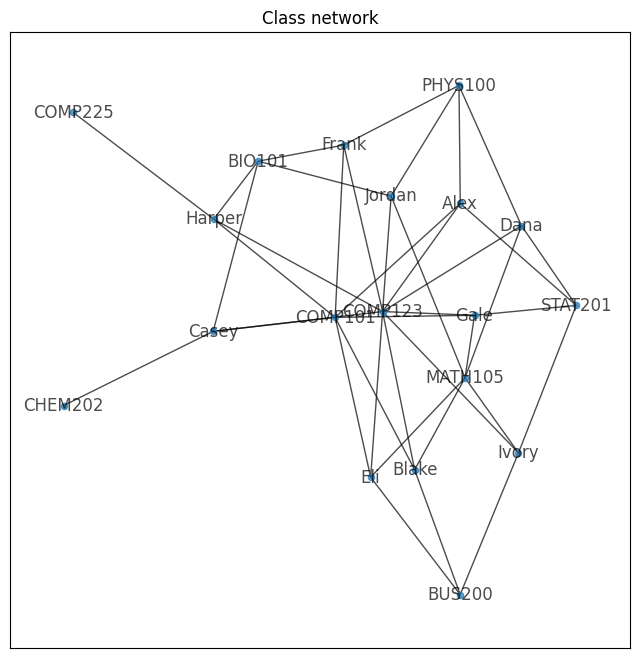

In [7]:
pos_class = nx.spring_layout(G_classes)
plt.figure(figsize=(8,8))
nx.draw_networkx(G_classes, pos=pos_class, node_size=20, alpha=0.7)
plt.title('Class network')
plt.show()

# Characterise the network

Calculate the average clustering coefficient and the average shortest path length in the network, and calculate what $N$ and $log(N)$ are -- $N$ is the number of students and units (in total).

In [8]:
avg_clust_class = nx.average_clustering(G_classes)
print('Class network average clustering coefficient:', avg_clust_class)

if nx.is_connected(G_classes):
    avg_shortest_class = nx.average_shortest_path_length(G_classes)
else:
    subgraph = G_classes.subgraph(max(nx.connected_components(G_classes), key=len))
    avg_shortest_class = nx.average_shortest_path_length(subgraph)
    
print('Class network average shortest path length:', avg_shortest_class)
print('N: ', G_classes.number_of_nodes())
print('log(N): ', math.log(G_classes.number_of_nodes()))

Class network average clustering coefficient: 0.0
Class network average shortest path length: 2.198830409356725
N:  19
log(N):  2.9444389791664403


 Based on these metrics for your class network, does it look more like:
- a **random graph** (low clustering, average path around $\log(N)$)
- a **small world** network (high clustering, average path around $\log(N)$)
- a **chain** (average path grows with $N$, low clustering)
- or **other**?

A bipartite is formed since there are no triangles (and hence there's no clustering).

Hence we have a **random graph**.

# Airport data

Downloaded from [https://www.bitre.gov.au/publications/ongoing/domestic_airline_activity-time_series](https://www.bitre.gov.au/publications/ongoing/domestic_airline_activity-time_series)

Read the Excel file (`TopRoutesJuly2014Feb2025.xlsx`) that lists the top airline routes. You'll need to specify the sheet name as "Top Routes" and skip the first 12 rows.


In [9]:
raw_route_information = pd.read_excel('TopRoutesJuly2014Jul2025.xlsx',
                                      sheet_name='Top Routes',
                                      skiprows=12)
raw_route_information

,City Pair Route,Unnamed: 1,Year,Month,Revenue,Aircraft,Rev Pax,Distance,RPKs,ASKs,...,Unnamed: 11,Revenue.1,Aircraft.1,Rev Pax.1,Unnamed: 15,RPKs.1,ASKs.1,Seats.1,Unnamed: 19,City Pair Route.1
0,Industry Domestic/Regional,NaN,NaN,NaN,Passengers,Trips (a),LF %,GC (klm),NaN,NaN,...,NaN,Passengers,Trips (a),LF %,NaN,NaN,NaN,NaN,NaN,NaN
1,ABX,SYD,2014.0,7.0,19747,589,65.807978,452,8925644.0,13563164.0,...,NaN,229468,6600,68.588611,NaN,103719536.0,151219764.0,334557.0,NaN,Albury - Sydney
2,ABX,SYD,2014.0,8.0,21085,573,69.183319,452,9530420.0,13775604.0,...,,229262,6581,68.368865,NaN,103626424.0,151569612.0,335331.0,,Albury - Sydney
3,ABX,SYD,2014.0,9.0,20138,536,67.486595,452,9102376.0,13487680.0,...,,228841,6553,67.894663,NaN,103436132.0,152347956.0,337053.0,,Albury - Sydney
4,ABX,SYD,2014.0,10.0,20620,545,67.90713,452,9320240.0,13724980.0,...,,228101,6520,67.366714,NaN,103101652.0,153045392.0,338596.0,,Albury - Sydney
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9620,SYD,WGA,2025.0,3.0,14513,390,67.402006,367,5326271.0,7902244.0,...,NaN,162285,4530,63.997555,NaN,59558595.0,93063860.0,253580.0,NaN,Sydney - Wagga Wagga
9621,SYD,WGA,2025.0,4.0,13940,332,74.00722,367,5115980.0,6912812.0,...,NaN,162518,4470,64.795707,NaN,59644106.0,92049472.0,250816.0,NaN,Sydney - Wagga Wagga
9622,SYD,WGA,2025.0,5.0,14907,377,72.455526,367,5470869.0,7550658.0,...,NaN,162841,4430,65.559125,NaN,59762647.0,91158396.0,248388.0,NaN,Sydney - Wagga Wagga
9623,SYD,WGA,2025.0,6.0,13287,351,68.766173,367,4876329.0,7091174.0,...,NaN,163146,4387,66.372934,NaN,59874582.0,90209334.0,245802.0,NaN,Sydney - Wagga Wagga


There is a column called "City Pair Route.1" which has the origin and destination airports.

- Drop the nulls
- Occasionally it has a newline character `'\n'` instead of a space, so replace those
- Drop the duplicates

In [10]:
flights = raw_route_information['City Pair Route.1'].str.replace('\n', ' ').drop_duplicates().dropna()
flights

1                Albury - Sydney
134     Adelaide - Alice Springs
259          Adelaide - Brisbane
392          Adelaide - Canberra
525            Adelaide - Cairns
                  ...           
8970     Port Macquarie - Sydney
9103            Ballina - Sydney
9236           Sydney - Tamworth
9359         Sydney - Townsville
9492        Sydney - Wagga Wagga
Name: City Pair Route.1, Length: 79, dtype: object

Create a graph for the airport network.


In [11]:
airport_network = nx.Graph()

Add an edge for each flight. You will need to iterate over the values in the flights column and split the string on ' - '

In [12]:
for flight in list(flights):
    source, dest = flight.split(' - ')
    airport_network.add_edge(source, dest)

Check how many airports and routes are in the network.

In [13]:
airport_network.number_of_nodes(), airport_network.number_of_edges()

(42, 79)

### Visualise the graph


Create a layout for the network visualization.


In [14]:
pos = nx.spring_layout(airport_network)

Draw the nodes and edges using Matplotlib.


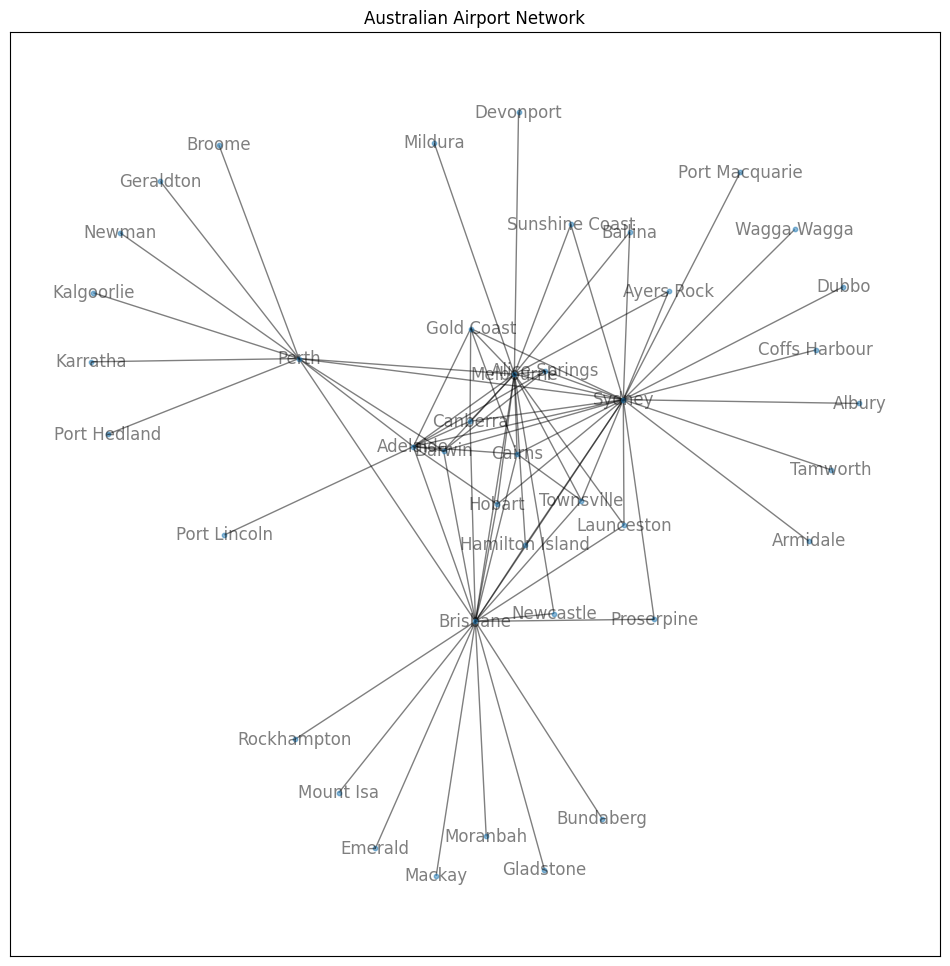

In [15]:
plt.figure(figsize=(12,12))
nx.draw_networkx(airport_network, pos=pos, node_size=10, alpha=0.5, with_labels=True)
plt.title('Australian Airport Network')
plt.show()

### Average clustering and path length


Calculate the average clustering coefficient.


In [16]:
avg_clust = nx.average_clustering(airport_network)
print('Average clustering:', avg_clust)

Average clustering: 0.34807173291154986


Find the average shortest path length. For disconnected graphs, use the largest connected component.


In [17]:
if nx.is_connected(airport_network):
    avg_shortest = nx.average_shortest_path_length(airport_network)
else:
    subgraph = airport_network.subgraph(max(nx.connected_components(airport_network), key=len))
    avg_shortest = nx.average_shortest_path_length(subgraph)

print('Average shortest path length:', avg_shortest)


Average shortest path length: 2.2857142857142856


Calculate $N$ and $log(N)$

In [18]:
print(airport_network.number_of_nodes())
print(math.log(airport_network.number_of_nodes()))

42
3.7376696182833684


Based on the last two outputs, does this airport network look more like:
- a **random graph** (low clustering, average path around $\log(N)$)
- a **small world** network (high clustering, average path around $\log(N)$)
- a **chain** (average path grows with $N$, low clustering)
- or **other**?

Looks most like a **small world** network.

### Is it a scale-free (ultra small world) distribution?

Calculate the degree of each airport and plot the distribution on a log scale.

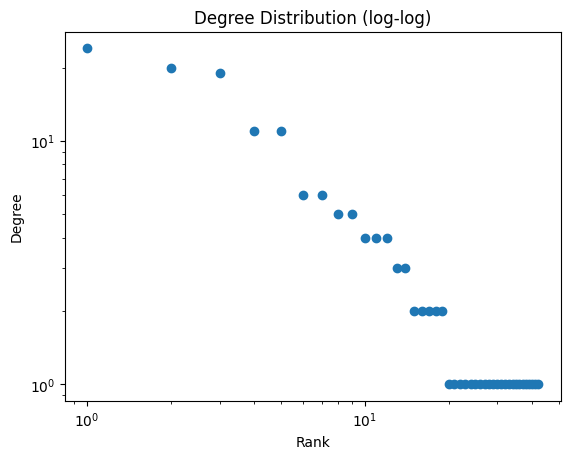

In [19]:
degrees = [d for _, d in airport_network.degree()]
degrees_sorted = sorted(degrees, reverse=True)
plt.figure()
# plt.loglog(degrees_sorted, marker='o', linestyle='None')
plt.loglog(np.arange(len(degrees_sorted))+1, degrees_sorted, marker='o', linestyle='None')
plt.xlabel('Rank')
plt.ylabel('Degree')
plt.title('Degree Distribution (log-log)')
plt.show()


In [20]:
airport_network.degree()

DegreeView({'Albury': 1, 'Sydney': 24, 'Adelaide': 11, 'Alice Springs': 4, 'Brisbane': 20, 'Canberra': 5, 'Cairns': 6, 'Darwin': 6, 'Hobart': 4, 'Melbourne': 19, 'Gold Coast': 5, 'Perth': 11, 'Port Lincoln': 1, 'Armidale': 1, 'Ayers Rock': 2, 'Bundaberg': 1, 'Broome': 1, 'Emerald': 1, 'Gladstone': 1, 'Hamilton Island': 3, 'Mount Isa': 1, 'Launceston': 3, 'Mackay': 1, 'Moranbah': 1, 'Newcastle': 2, 'Proserpine': 2, 'Rockhampton': 1, 'Townsville': 4, 'Coffs Harbour': 1, 'Dubbo': 1, 'Devonport': 1, 'Geraldton': 1, 'Kalgoorlie': 1, 'Karratha': 1, 'Sunshine Coast': 2, 'Mildura': 1, 'Ballina': 2, 'Port Hedland': 1, 'Newman': 1, 'Port Macquarie': 1, 'Tamworth': 1, 'Wagga Wagga': 1})

Does the log-log graph look linear?

Almost! The rank-1 city has a slightly lower degree than we might expect from a power-law fit but it's close.

### Centrality measures


Define a helper function to show the top airports for a metric.


Compute degree centrality. It returns a dictionary; it is often convenient to turn it into a Series and only show the top few.


In [21]:
pd.Series(nx.degree_centrality(airport_network)).nlargest(5)

Sydney       0.585366
Brisbane     0.487805
Melbourne    0.463415
Adelaide     0.268293
Perth        0.268293
dtype: float64

Compute betweenness centrality.


In [22]:
pd.Series(nx.betweenness_centrality(airport_network)).nlargest(5)

Sydney       0.422825
Brisbane     0.367927
Perth        0.274390
Melbourne    0.206362
Adelaide     0.068760
dtype: float64

Compute closeness centrality.


In [23]:
pd.Series(nx.closeness_centrality(airport_network)).nlargest(5)

Sydney       0.706897
Brisbane     0.661290
Melbourne    0.650794
Adelaide     0.577465
Perth        0.577465
dtype: float64

Compute PageRank.


In [24]:
pd.Series(nx.pagerank(airport_network)).nlargest(5)

Sydney       0.141525
Brisbane     0.121660
Melbourne    0.104674
Perth        0.075995
Adelaide     0.059703
dtype: float64

Compute eigenvector centrality.


In [25]:
pd.Series(nx.eigenvector_centrality(airport_network)).nlargest(5)

Sydney       0.428276
Melbourne    0.400700
Brisbane     0.365404
Adelaide     0.307111
Darwin       0.221616
dtype: float64

Based on the centrality measures above, which airport is the most **central** or influential in this network?

Sydney is far and away the most central airport for Australia

There are differences in the **second** most central node. What is that reflecting?

In most cases, Brisbane is the second most central node. However, Melbourne is the second most central city for the eigenvector centrality. This is because Melbourne is (proportionally) connected to more cities with high degree than Brisbane is, and so there's more 'flow' through Melbourne.  

### Ego network of the center of the network

We can get a bit of an understanding of the core of the network by picking a very central node and then creating an ego network from it.

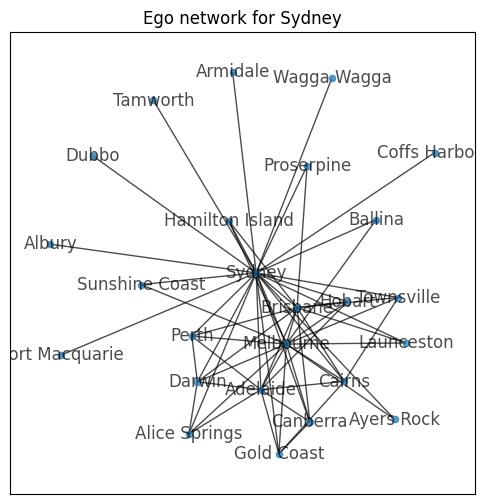

In [26]:
ego_net = nx.ego_graph(airport_network, 'Sydney')
plt.figure(figsize=(6,6))
pos = nx.spring_layout(ego_net)
nx.draw_networkx(ego_net, pos=pos, node_size=20, alpha=0.7, with_labels=True)
plt.title(f'Ego network for Sydney')
plt.show()

### Try an alternate visualisation of the ego network


Draw the same ego network using a shell layout.


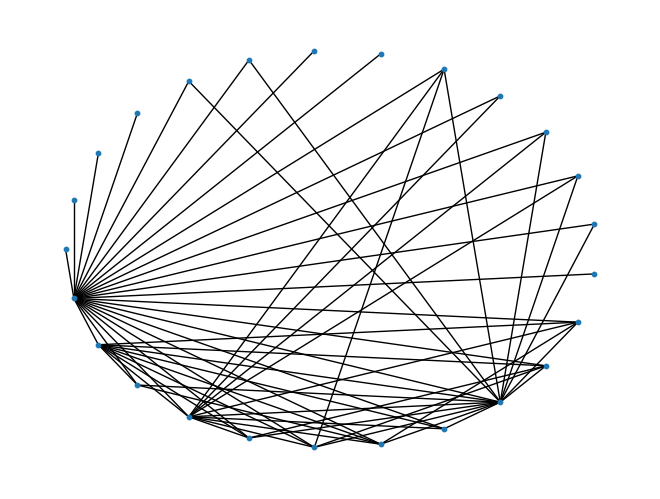

In [27]:
nx.draw_shell(ego_net, node_size=10)

### Community detection

Sometimes we don't want to focus on the core of the network -- sometimes we want to get an overview of the whole network.

Run greedy modularity to find communities.


In [28]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(airport_network)

Print the number of communities and their members.


In [29]:
print('Number of communities:', len(communities))
for c in communities:
    print(c)


Number of communities: 6
frozenset({'Gladstone', 'Moranbah', 'Emerald', 'Bundaberg', 'Hamilton Island', 'Mackay', 'Rockhampton', 'Proserpine', 'Brisbane', 'Mount Isa'})
frozenset({'Albury', 'Port Macquarie', 'Wagga Wagga', 'Armidale', 'Dubbo', 'Sydney', 'Hobart', 'Tamworth', 'Coffs Harbour'})
frozenset({'Mildura', 'Ballina', 'Ayers Rock', 'Newcastle', 'Sunshine Coast', 'Melbourne', 'Launceston', 'Devonport'})
frozenset({'Perth', 'Geraldton', 'Karratha', 'Broome', 'Kalgoorlie', 'Newman', 'Port Hedland'})
frozenset({'Adelaide', 'Canberra', 'Gold Coast', 'Alice Springs', 'Darwin', 'Port Lincoln'})
frozenset({'Cairns', 'Townsville'})
